In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(42)
tf.random.set_seed(42)

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

def load_and_preprocess_data(data_dir):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, validation_generator

def create_model(num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

data_dir = '/content/drive/MyDrive/PRODIGY-ML-04/train_03'
train_generator, validation_generator = load_and_preprocess_data(data_dir)

num_classes = len(train_generator.class_indices)

model = create_model(num_classes)

# Implement error handling during fitting
try:
    history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=validation_generator
    )
except Exception as e:
    print(f"An error occurred during training: {e}")
    # Further investigation or handling of the error

model.save('hand_gesture_model.h5')

Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


An error occurred during training: cannot identify image file <_io.BytesIO object at 0x79f1e7eb2980>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


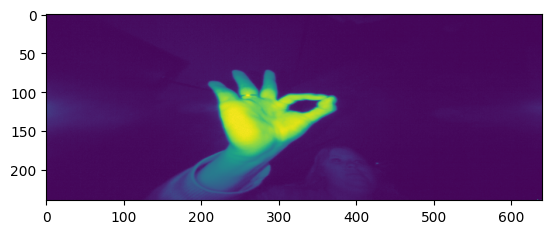

The predicted hand gesture is: 04_fist_moved


In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image
from skimage.io import imread
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('hand_gesture_model.h5')

def predict_hand_gesture(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    class_labels = list(train_generator.class_indices.keys())
    predicted_gesture = class_labels[predicted_class]

    return predicted_gesture

image_path_to_predict = '/content/drive/MyDrive/PRODIGY-ML-04/test_03/frame_02_07_0009.png'
predicted_gesture = predict_hand_gesture(image_path_to_predict)

img=imread(image_path_to_predict)
plt.imshow(img)
plt.show()

print(f"The predicted hand gesture is: {predicted_gesture}")